# Fase 3: Análisis de Resultados (Dashboard) - Granular

Visualización detallada de la proyección semántica con **Ortogonalización Simétrica de Löwdin**.
Esto garantiza independencia matemática entre las dimensiones Funcional, Social y Afectiva sin sesgos.

**Marcadores**: 
- **Línea Sólida / Círculo**: Anclaje Contextual (Uso Real).
- **Línea Punteada / Cruz**: Anclaje Estático (Diccionario).

**Colores**:
- **Azul**: Funcional
- **Verde**: Social
- **Rojo**: Afectiva

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

results_path = '../data/phase3_results.parquet'

if os.path.exists(results_path):
    df = pd.read_parquet(results_path)
    print(f"Resultados cargados: {len(df)} ventanas.")
    print("Columnas disponibles:", df.columns.tolist())
else:
    print("ERROR: Resultados no encontrados.")

Resultados cargados: 21 ventanas.
Columnas disponibles: ['date', 'similarity', 'drift', 'entropy', 'k', 'centroid_drift', 'score_centroid_funcional_contextual', 'score_centroid_funcional_static', 'score_centroid_social_contextual', 'score_centroid_social_static', 'score_centroid_afectiva_contextual', 'score_centroid_afectiva_static', 'score_dim1_funcional_contextual', 'score_dim1_funcional_static', 'score_dim1_social_contextual', 'score_dim1_social_static', 'score_dim1_afectiva_contextual', 'score_dim1_afectiva_static', 'score_dim2_funcional_contextual', 'score_dim2_funcional_static', 'score_dim2_social_contextual', 'score_dim2_social_static', 'score_dim2_afectiva_contextual', 'score_dim2_afectiva_static', 'intrinsic_dimension_k']


## 1. Evolución de la Posición Central (Centroide)
¿Hacia qué temas se mueve el discurso general sobre Yape?

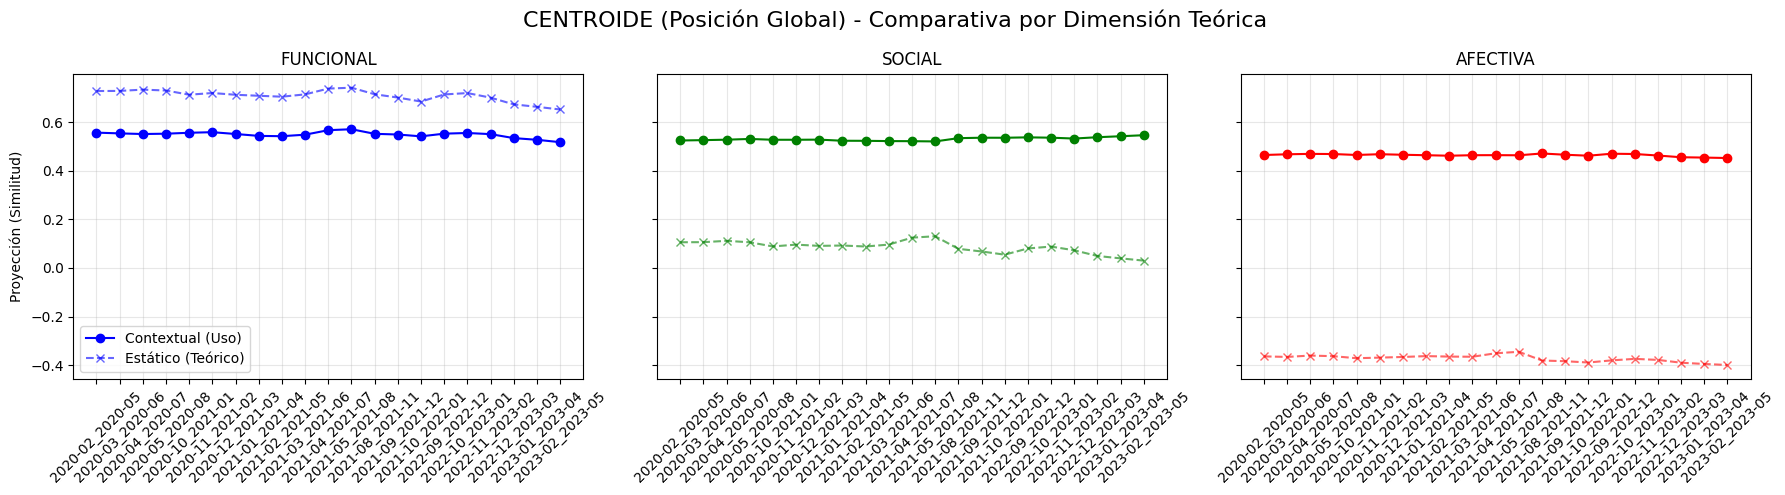

In [2]:
def plot_projection_row(df, metric_prefix, title_prefix):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)
    
    dims = {
        'funcional': {'color': 'blue', 'ax': axes[0]},
        'social': {'color': 'green', 'ax': axes[1]},
        'afectiva': {'color': 'red', 'ax': axes[2]}
    }
    
    for dim_name, props in dims.items():
        ax = props['ax']
        color = props['color']
        
        # Contextual
        col_ctx = f'{metric_prefix}{dim_name}_contextual'
        if col_ctx in df.columns:
            ax.plot(df['date'], df[col_ctx], 
                    color=color, linestyle='-', marker='o', label='Contextual (Uso)')
        
        # Static
        col_sta = f'{metric_prefix}{dim_name}_static'
        if col_sta in df.columns:
            ax.plot(df['date'], df[col_sta], 
                    color=color, linestyle='--', marker='x', alpha=0.6, label='Estático (Teórico)')
            
        ax.set_title(f"{dim_name.upper()}")
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        if dim_name == 'funcional':
            ax.set_ylabel("Proyección (Similitud)")
            ax.legend()

    plt.suptitle(f"{title_prefix} - Comparativa por Dimensión Teórica", fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot Centroid
plot_projection_row(df, 'score_centroid_', 'CENTROIDE (Posición Global)')

## 2. Alineamiento de la Estructura Latente (Dimensión 1)
¿Qué significa la dimensión principal de varianza de Yape? ¿Es funcional, social o afectiva?

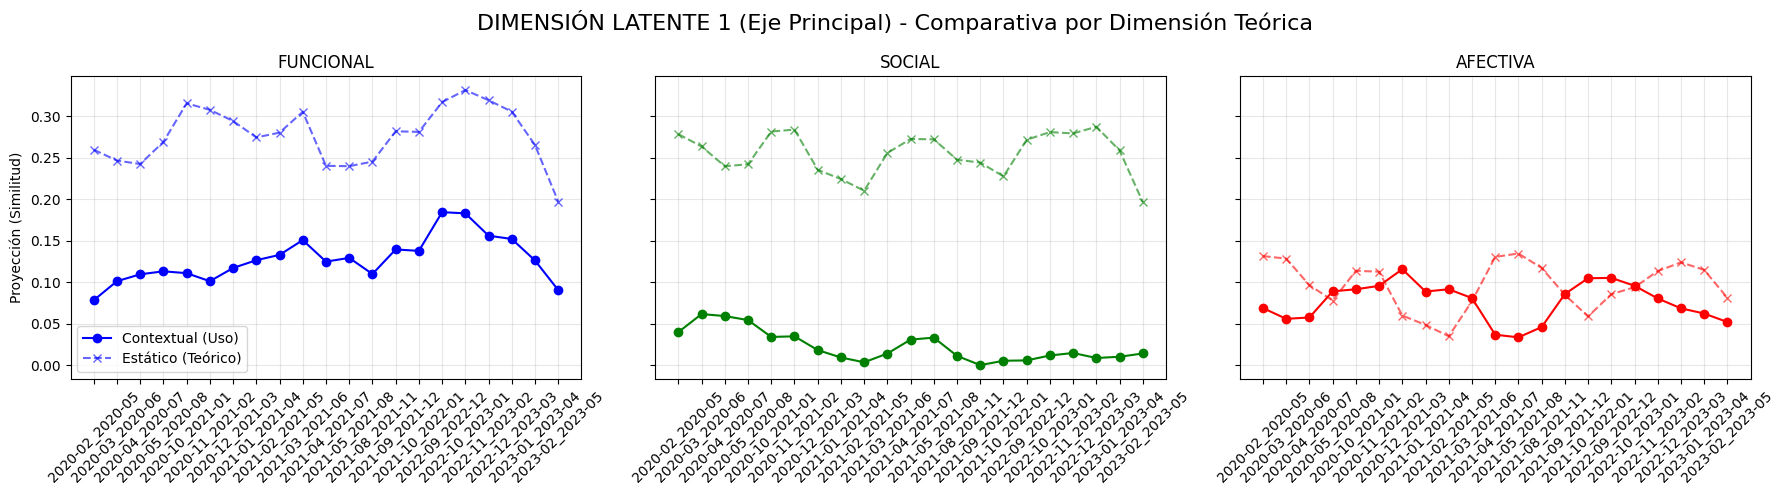

In [3]:
plot_projection_row(df, 'score_dim1_', 'DIMENSIÓN LATENTE 1 (Eje Principal)')

## 3. Alineamiento de la Estructura Latente (Dimensión 2)
¿Qué significa la segunda dimensión?

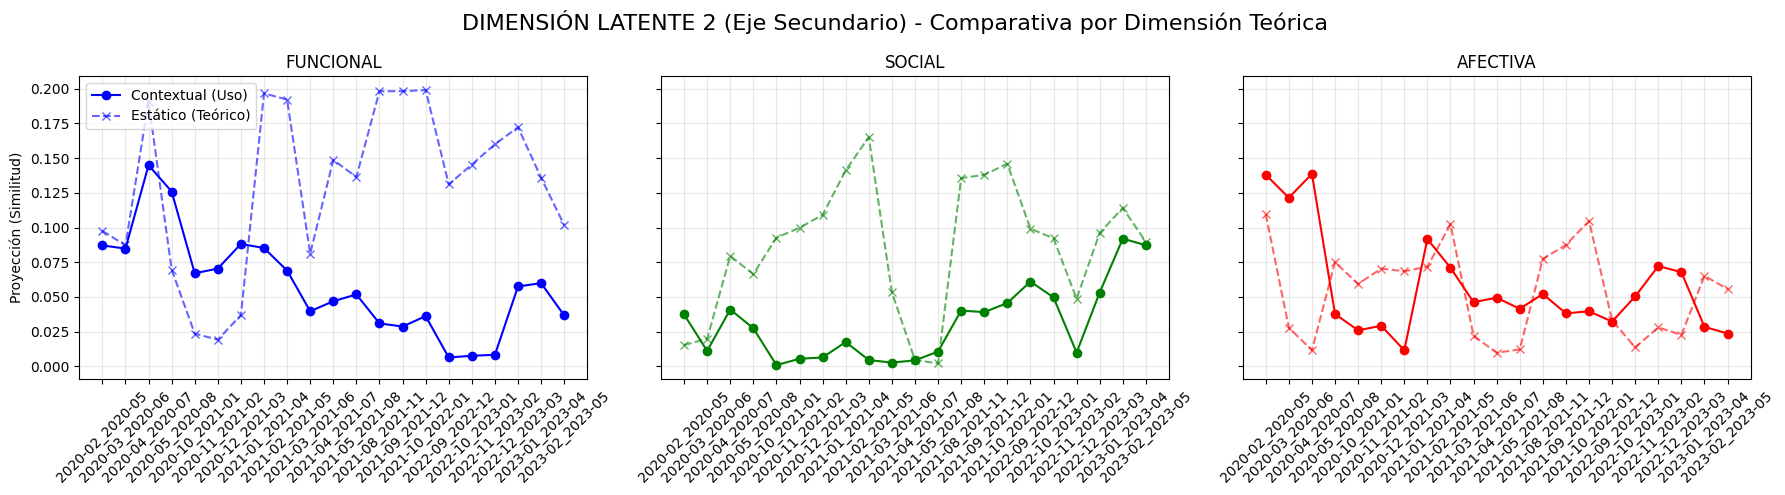

In [4]:
plot_projection_row(df, 'score_dim2_', 'DIMENSIÓN LATENTE 2 (Eje Secundario)')